<a href="https://colab.research.google.com/github/VKSi/2020_11_GB_TimeSeries/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Временные ряды 3. 

# Моделируем временные ряды по ARIMA

# Задание

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

2. Подберите параметры модели SARIMAX для этого ряда.

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

4. Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

5. Оцените результат моделирования

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

## Ответы

### Задание №1

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 

In [ ]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [ ]:
data = data.sort_values(by=['year', 'month', 'dayofmonth'], axis = 'index')
data_m = data.resample('M').mean()

In [ ]:
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


In [ ]:
data_m = pd.DataFrame(data_m['PJME_MW']).rename(columns={'PJME_MW': 'values'})

In [ ]:
data_m.head()

,values
Date,
2002-01-31,31075.399731
2002-02-28,30239.166667
2002-03-31,28875.256720
2002-04-30,28534.731572
2002-05-31,28073.653226


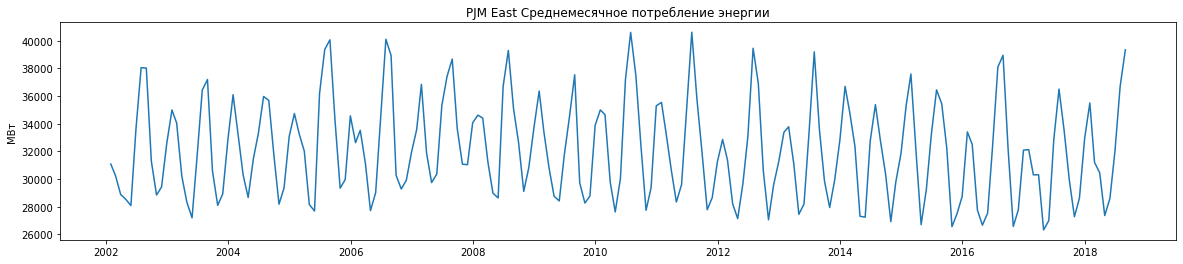

In [ ]:
plt.figure(figsize =(20,4))
plt.plot( data_m.index, data_m.values, label='month')
plt.title('PJM East Среднемесячное потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

### Задание №2

2. Подберите параметры модели SARIMAX для этого ряда.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
data = data_m

Посмотрим на автокорреляцию и частичную автокорреляцию

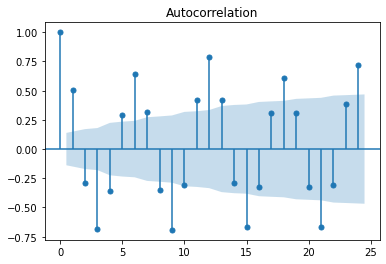

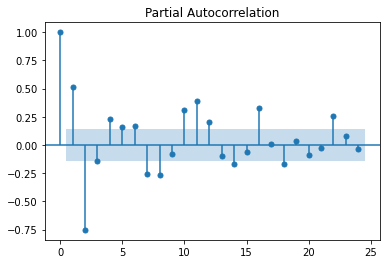

In [ ]:
sm.graphics.tsa.plot_acf(data['values'].values[:10000], lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(data['values'].values[:10000], lags=24)
plt.show()

Цитата из урока:
Сохраняется корреляция для квартальных лагов (3, 6, 9 и 12 месяцы - это наши сезонные колебания - ACF) и для разностей важными являются значения внутри первых 3-х значений (PACF). Это позволит определить, что ряд сезонный и следует использовать модель сезонности с периодом 12, 6 или 3 месяца. диапазон поиска параметров модели ARIMA для лучшего описания нашего ряда в диапазоне до первых разностей и сглаживаний первого порядка.


#### Посмотрим на вариант модели

In [ ]:
# Определим p, d и q 
q = 2
p = 0
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с месячными данными, посмотрим на сезонность 12 месяцев
qs = 1
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs, 12] 

In [ ]:
import warnings

In [ ]:
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['values'].values[:-12],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 2, 2]x[0, 0, 1, 12] - AIC:3208.8171634757655


In [ ]:
print(results.summary().tables[0],results.summary().tables[1])

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  188
Model:             SARIMAX(0, 2, 2)x(0, 0, [1], 12)   Log Likelihood               -1600.409
Date:                              Mon, 02 Nov 2020   AIC                           3208.817
Time:                                      21:23:21   BIC                           3221.384
Sample:                                           0   HQIC                          3213.916
                                              - 188                                         
Covariance Type:                                opg                                         
============================================================================================ ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----

Анализ результатов по results:
- коэффициенты при элементах модели имеют большие значения (особенно важны составляющие сглаживания coef: ma.L1, ma.L2 , ma.S.L12)
- можно посмотреть на остатки ряда (results.resid) с точки зрения автокорреляции и убедиться, что они не имеют значительной корреляции (это хорошо, т.к. остатки имеют характер белого шума)

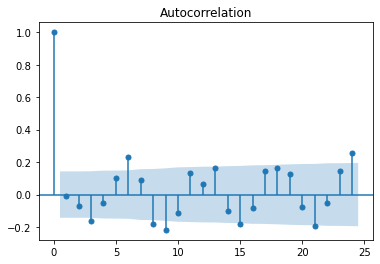

In [ ]:
sm.graphics.tsa.plot_acf(results.resid, lags=24)
plt.show()

Видно, что полугодовая сезонность (6) осталась

Оценим близости распределений остатков модели к нормальному закону используя визуализацию plot_diagnostics: 
- левый верхний график - остатки ряда 
- правый верхний - гистограмма для остатков ряда
- левый нижний - упорядоченное распределение остатков (квантильное)
- правый нижний - коррелограмма остатков

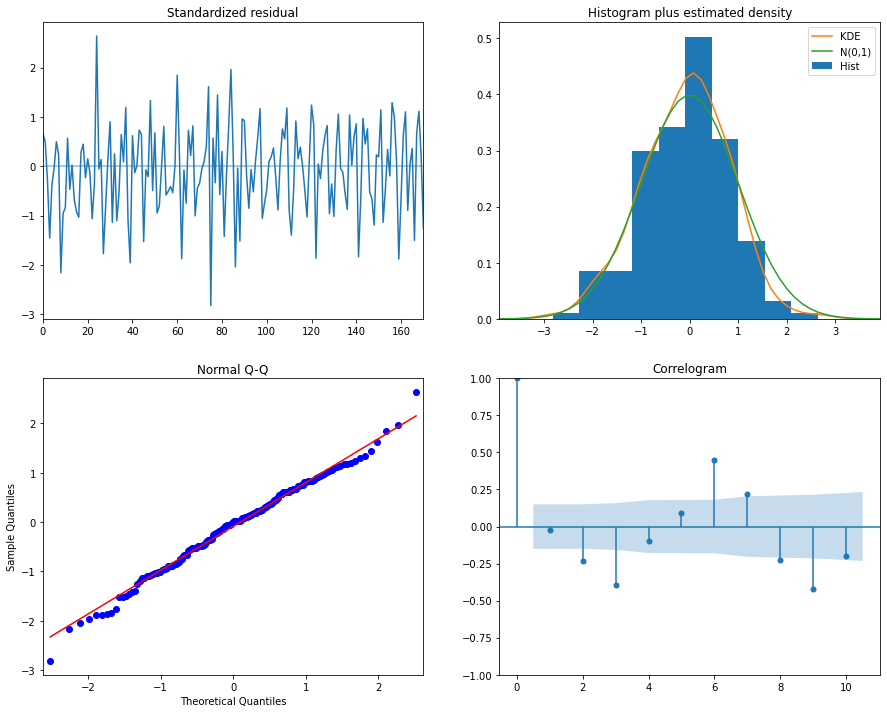

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


В этом случае диагностика показала, что остатки модели правильно распределяются:
- estimated density на верхнем-правом графике красная линия KDE находится близко к линии N (0,1) (где N (0,1) является стандартным обозначением нормального распределения со средним 0 и стандартным отклонением 1) . Очевидно, что остатки нормально распределены.
- График q-q в левом нижнем углу показывает, что упорядоченное распределение остатков (синие точки) следует линейному тренду выборок, взятых из стандартного распределения N (0, 1). Опять же, это признак того, что остатки нормально распределены.
- Остатки с течением времени (верхний левый график) показывают сезонность!. Это подтверждается графиком автокорреляции (внизу справа), который показывает, что остатки временных рядов имеют корреляцию с запаздывающими данными с лагом 3, 6 и 9 месяцев.

Эти графики позволяют сделать вывод о том, что выбранная модель НЕ подходит для анализа и прогнозирования данных временных рядов.

#### Составим сетку и найдем оптимальные параметры для модели

In [ ]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

# зададим сезонность p, q и q
p = [0] 
d = [0, 1]
q = range(0, 3)
s = [3, 6, 9, 12]
seasonal_pdq = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(p, d, q, s))]
print(len(seasonal_pdq))

24


In [ ]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['values'].values[:-12], order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 0, 6)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 0, 9)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 3)3 - AIC:4243.8622416209855
ARIMA(0, 0, 0)x(0, 0, 1, 6)3 - AIC:4156.427324595836
ARIMA(0, 0, 0)x(0, 0, 1, 9)3 - AIC:4104.466065859929
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4015.3605742791756
ARIMA(0, 0, 0)x(0, 0, 2, 3)3 - AIC:4125.296036006444
ARIMA(0, 0, 0)x(0, 0, 2, 6)3 - AIC:3987.7302382236944
ARIMA(0, 0, 0)x(0, 0, 2, 9)3 - AIC:3855.1417299498
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3714.465932811071
ARIMA(0, 0, 0)x(0, 1, 0, 3)3 - AIC:3755.4743762989865
ARIMA(0, 0, 0)x(0, 1, 0, 6)3 - AIC:3398.419994288184
ARIMA(0, 0, 0)x(0, 1, 0, 9)3 - AIC:3637.2823998499034
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3153.6893700282526
ARIMA(0, 0, 0)x(0, 1, 1, 3)3 - AIC:3597.001715729807
ARIMA(0, 0, 0)x(0, 1, 1, 6)3 - AIC:3208.774303336656
ARIMA(0, 0, 0)x(0, 1, 1, 9)3 - AIC:338

ARIMA(0, 2, 0)x(0, 0, 2, 6)3 - AIC:3304.3616851449015
ARIMA(0, 2, 0)x(0, 0, 2, 9)3 - AIC:3192.3545035227057
ARIMA(0, 2, 0)x(0, 0, 2, 12)3 - AIC:3101.508155056795
ARIMA(0, 2, 0)x(0, 1, 0, 3)3 - AIC:3750.1551897350055
ARIMA(0, 2, 0)x(0, 1, 0, 6)3 - AIC:3455.5979515595554
ARIMA(0, 2, 0)x(0, 1, 0, 9)3 - AIC:3635.3204340869697
ARIMA(0, 2, 0)x(0, 1, 0, 12)3 - AIC:3328.531187794495
ARIMA(0, 2, 0)x(0, 1, 1, 3)3 - AIC:3577.0609494406035
ARIMA(0, 2, 0)x(0, 1, 1, 6)3 - AIC:3281.4239899510594
ARIMA(0, 2, 0)x(0, 1, 1, 9)3 - AIC:3354.5662742364593
ARIMA(0, 2, 0)x(0, 1, 1, 12)3 - AIC:3052.1080070462294
ARIMA(0, 2, 0)x(0, 1, 2, 3)3 - AIC:3509.710850715711
ARIMA(0, 2, 0)x(0, 1, 2, 6)3 - AIC:3167.0398950550803
ARIMA(0, 2, 0)x(0, 1, 2, 9)3 - AIC:3157.9609132177143
ARIMA(0, 2, 0)x(0, 1, 2, 12)3 - AIC:2825.2367442169975
ARIMA(0, 2, 1)x(0, 0, 0, 3)3 - AIC:3584.8231178610317
ARIMA(0, 2, 1)x(0, 0, 0, 6)3 - AIC:3584.8231178610317
ARIMA(0, 2, 1)x(0, 0, 0, 9)3 - AIC:3584.8231178610317
ARIMA(0, 2, 1)x(0, 0, 0, 12

ARIMA(1, 1, 0)x(0, 1, 1, 12)3 - AIC:2901.3820427959727
ARIMA(1, 1, 0)x(0, 1, 2, 3)3 - AIC:3360.081258193836
ARIMA(1, 1, 0)x(0, 1, 2, 6)3 - AIC:3012.7958891328153
ARIMA(1, 1, 0)x(0, 1, 2, 9)3 - AIC:3113.756294779393
ARIMA(1, 1, 0)x(0, 1, 2, 12)3 - AIC:2677.87790335768
ARIMA(1, 1, 1)x(0, 0, 0, 3)3 - AIC:3511.1326735862194
ARIMA(1, 1, 1)x(0, 0, 0, 6)3 - AIC:3511.1326735862194
ARIMA(1, 1, 1)x(0, 0, 0, 9)3 - AIC:3511.1326735862194
ARIMA(1, 1, 1)x(0, 0, 0, 12)3 - AIC:3511.1326735862194
ARIMA(1, 1, 1)x(0, 0, 1, 3)3 - AIC:3367.011572464264
ARIMA(1, 1, 1)x(0, 0, 1, 6)3 - AIC:3354.9770227913823
ARIMA(1, 1, 1)x(0, 0, 1, 9)3 - AIC:3238.8439934833737
ARIMA(1, 1, 1)x(0, 0, 1, 12)3 - AIC:3215.1926109652577
ARIMA(1, 1, 1)x(0, 0, 2, 3)3 - AIC:3326.5201501747174
ARIMA(1, 1, 1)x(0, 0, 2, 6)3 - AIC:3151.8702216744023
ARIMA(1, 1, 1)x(0, 0, 2, 9)3 - AIC:3095.880285498792
ARIMA(1, 1, 1)x(0, 0, 2, 12)3 - AIC:2943.3804236868705
ARIMA(1, 1, 1)x(0, 1, 0, 3)3 - AIC:3694.963567114134
ARIMA(1, 1, 1)x(0, 1, 0, 6)3 -

ARIMA(2, 0, 1)x(0, 0, 1, 3)3 - AIC:3460.7906659122145
ARIMA(2, 0, 1)x(0, 0, 1, 6)3 - AIC:3406.1527235243993
ARIMA(2, 0, 1)x(0, 0, 1, 9)3 - AIC:3292.100229477007
ARIMA(2, 0, 1)x(0, 0, 1, 12)3 - AIC:3274.6257421271957
ARIMA(2, 0, 1)x(0, 0, 2, 3)3 - AIC:3341.506443017307
ARIMA(2, 0, 1)x(0, 0, 2, 6)3 - AIC:3254.587428808055
ARIMA(2, 0, 1)x(0, 0, 2, 9)3 - AIC:3113.0263515229526
ARIMA(2, 0, 1)x(0, 0, 2, 12)3 - AIC:3008.7705073853067
ARIMA(2, 0, 1)x(0, 1, 0, 3)3 - AIC:3420.1660302467226
ARIMA(2, 0, 1)x(0, 1, 0, 6)3 - AIC:3296.1649933756735
ARIMA(2, 0, 1)x(0, 1, 0, 9)3 - AIC:3335.635548733838
ARIMA(2, 0, 1)x(0, 1, 0, 12)3 - AIC:3117.164962965185
ARIMA(2, 0, 1)x(0, 1, 1, 3)3 - AIC:3299.8747444899363
ARIMA(2, 0, 1)x(0, 1, 1, 6)3 - AIC:3096.663803614181
ARIMA(2, 0, 1)x(0, 1, 1, 9)3 - AIC:3133.857382375804
ARIMA(2, 0, 1)x(0, 1, 1, 12)3 - AIC:2898.222823894131
ARIMA(2, 0, 1)x(0, 1, 2, 3)3 - AIC:3232.0140364819135
ARIMA(2, 0, 1)x(0, 1, 2, 6)3 - AIC:2971.5113034456817
ARIMA(2, 0, 1)x(0, 1, 2, 9)3 - A

ARIMA(2, 2, 1)x(0, 1, 0, 9)3 - AIC:3445.203319729604
ARIMA(2, 2, 1)x(0, 1, 0, 12)3 - AIC:3158.3354384841864
ARIMA(2, 2, 1)x(0, 1, 1, 3)3 - AIC:3397.2261937244257
ARIMA(2, 2, 1)x(0, 1, 1, 6)3 - AIC:3131.5921774116387
ARIMA(2, 2, 1)x(0, 1, 1, 9)3 - AIC:3215.6102481270404
ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:2880.392553920694
ARIMA(2, 2, 1)x(0, 1, 2, 3)3 - AIC:3315.2814697355957
ARIMA(2, 2, 1)x(0, 1, 2, 6)3 - AIC:2969.2407154712164
ARIMA(2, 2, 1)x(0, 1, 2, 9)3 - AIC:2952.661721529891
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:2636.1606901256437
ARIMA(2, 2, 2)x(0, 0, 0, 3)3 - AIC:3339.4547332744914
ARIMA(2, 2, 2)x(0, 0, 0, 6)3 - AIC:3339.4547332744914
ARIMA(2, 2, 2)x(0, 0, 0, 9)3 - AIC:3339.4547332744914
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:3339.4547332744914
ARIMA(2, 2, 2)x(0, 0, 1, 3)3 - AIC:3284.8645019217624
ARIMA(2, 2, 2)x(0, 0, 1, 6)3 - AIC:3230.084962027142
ARIMA(2, 2, 2)x(0, 0, 1, 9)3 - AIC:3137.9787090165923
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:3115.9610170142932
ARIMA(2, 2, 2)x(0, 0, 2, 3)

Лучшие результаты на недельных данных параметры модели SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:2613

In [ ]:
#для построения модели используем все данные, кроме 12-ти последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения
N1 = 0   # берем дданные не от начала - так быстрее работает
N2 = 12  # число точек для теста
nforecast = N2 + 30

mod = sm.tsa.statespace.SARIMAX(data_m['values'].values[N1:-N2],order=[0, 1, 2],
                                seasonal_order=[0, 1, 2, 12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()

In [ ]:
print(results_opt.summary().tables[0], results_opt.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1301.504
Date:                            Mon, 02 Nov 2020   AIC                           2613.008
Time:                                    21:53:33   BIC                           2627.994
Sample:                                         0   HQIC                          2619.096
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

Анализ результатов по results:
- коэффициенты при элементах модели имеют большие значения (особенно важны составляющие сглаживания coef: ma.L1, ma.L2 , ma.S.L12)     
NB! ma.S.L24 не очень большой. Но попытка убрать 2-е сглаживание ухудшает метрику.
- можно посмотреть на остатки ряда (results.resid) с точки зрения автокорреляции и убедиться, что они не имеют значительной корреляции (это хорошо, т.к. остатки имеют характер белого шума)

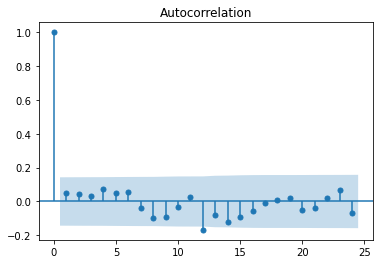

In [ ]:
sm.graphics.tsa.plot_acf(results_opt.resid, lags=24)
plt.show()

Автокорреляции практически не осталось!

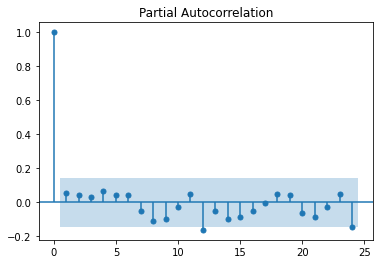

In [ ]:
sm.graphics.tsa.plot_pacf(results_opt.resid, lags=24)
plt.show()

Оценим близости распределений остатков модели к нормальному закону используя визуализацию plot_diagnostics: 
- левый верхний график - остатки ряда 
- правый верхний - гистограмма для остатков ряда
- левый нижний - упорядоченное распределение остатков (квантильное)
- правый нижний - коррелограмма остатков

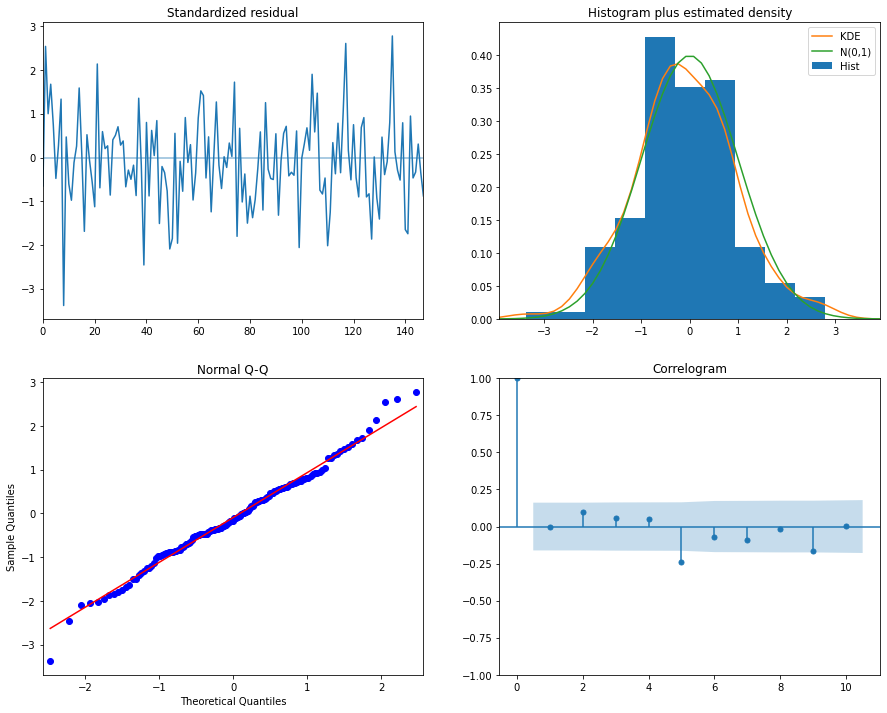

In [ ]:
results_opt.plot_diagnostics(figsize=(15, 12))
plt.show()


Графики выглядят лучше, чем для пробной модели. ВИдно, что сезонность почти побеждена

Проведем моделирование прогноза на основе найденой SARIMAX[0, 1, 2]x[0, 1, 2, 52]  и модели  SARIMA(0, 2, 2)x(0, 0, 1, 12) для последних 12 месяцев (и предсказание следующих 30) и сравним их с фактом.

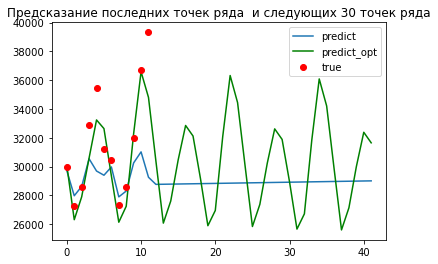

In [ ]:
nforecast = N2 + 30  # полное число предиктов (тест+ чистый предикт)

pred_dynamic = results.forecast(nforecast)    #делаем предсказание на 30 точек от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(nforecast)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )

#Отобразим истинный значения 
plt.plot(data_m['values'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

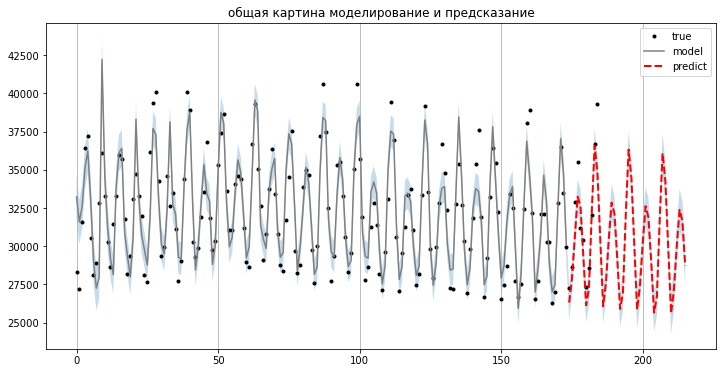

In [ ]:
N3 = 15  # отступ данных для отображения  модели
nforecast = N2 + 30  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_m['values'].values[N3 + N1:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

### Задание №3

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

С точки зрения параметров модель почти не изменилась.      
Для недельного фрейма лучшим набором параметров был SARIMA(1, 1, 2)x(0, 1, 2, 52)
Для месячного фрейма лучшим набором стал SARIMA(0, 1, 2)x(0, 1, 2, 12), но при этом набор SARIMA(1, 1, 2)x(0, 1, 2, 12) по метрике AIC практически не отличается (2614 vs 2613). В свою очередь использованная сезонность в 52 недели соответствует годовому циклу, так же как и 12 месяцев.

### Задание №4

4. Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [ ]:
data = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])

In [ ]:
data = data.sort_values(by=['year', 'month', 'dayofmonth'], axis = 'index')
data_w = data.resample('W').mean()

In [ ]:
data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


In [ ]:
data_w = pd.DataFrame(data_w['Значение']).rename(columns={'Значение': 'values'})

In [ ]:
data_w.head()

,values
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


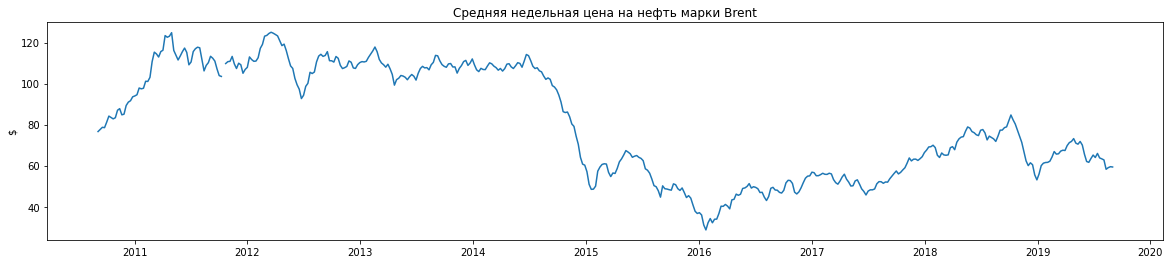

In [ ]:
plt.figure(figsize =(20,4))
plt.plot( data_w.index, data_w.values)
plt.title('Средняя недельная цена на нефть марки Brent')
plt.ylabel ( '$' )
plt.show()

In [ ]:
data = data_w[data_w.index >'2012-01-01']

Посмотрим на автокорреляцию и частичную автокорреляцию

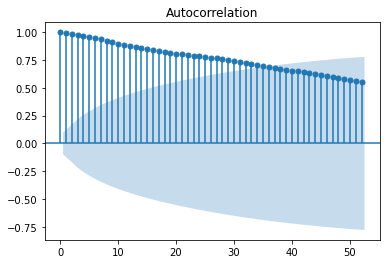

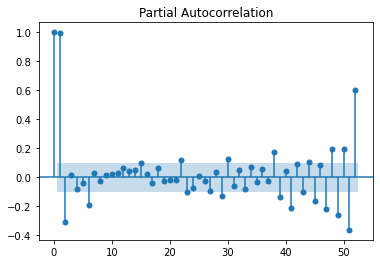

In [ ]:
sm.graphics.tsa.plot_acf(data['values'].values[:], lags=52)
plt.show()

sm.graphics.tsa.plot_pacf(data['values'].values[:], lags=52)
plt.show()

Построим ACF и PACF для первых разностей

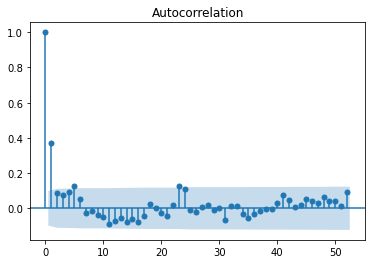

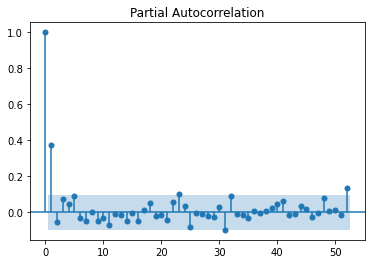

In [ ]:
data_dif = data['values'].diff(1)

sm.graphics.tsa.plot_acf(data_dif[1:], lags=52)
plt.show()

sm.graphics.tsa.plot_pacf(data_dif[1:], lags=52)
plt.show()

После дифференциации автокорреляция с большими лагами стала несущественной

Недельные графики показывают автокорреляцию цены со всеми значениями ранее (это не очень хорошо). Для PACF мы видим, что только 1-й и порядок разностей важен для нашего процесса (AR 1). Таким образом:
 - Сезона нет.
 - ACF - медленно падает для недельных графиков, а для первых разностей ACF - быстро падает (не более 1-й корреляции)  
 - PACF - быстро пададает, но потом растет,  а для первых разностей РACF - быстро падает (не более 1-й корреляции) 
 - q , p - берем р=1(2) (PACF) , q =1(2) (скорее всего не очень большой после производной)
 - ADF - 1 раз интегрируемый - d = 1 

Запустим модель без сезонного анализа (ARIMA)


In [ ]:
# Определим p, d и q 
q = 2
p = 2
d = 1
pdq = [p, d, q]

N2 = 30
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(data['values'].values[:-N2],
                               order=pdq, seasonal_order=[0,0,0,0],
                                 trend = 'ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

### Задание №5

5. Оцените результат моделирования

In [ ]:
print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 2] - AIC:1563.6750352905478
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  370
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -774.838
Date:                Mon, 02 Nov 2020   AIC                           1563.675
Time:                        22:42:02   BIC                           1590.993
Sample:                             0   HQIC                          1574.531
                                - 370                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

Коэффициент модели  ar.L2 имеет малое абсолютное значение, что свидетельствует о том, что он не играет роли при определении ответа модели. 

Посмотрим на визуализацию результатов работы модели

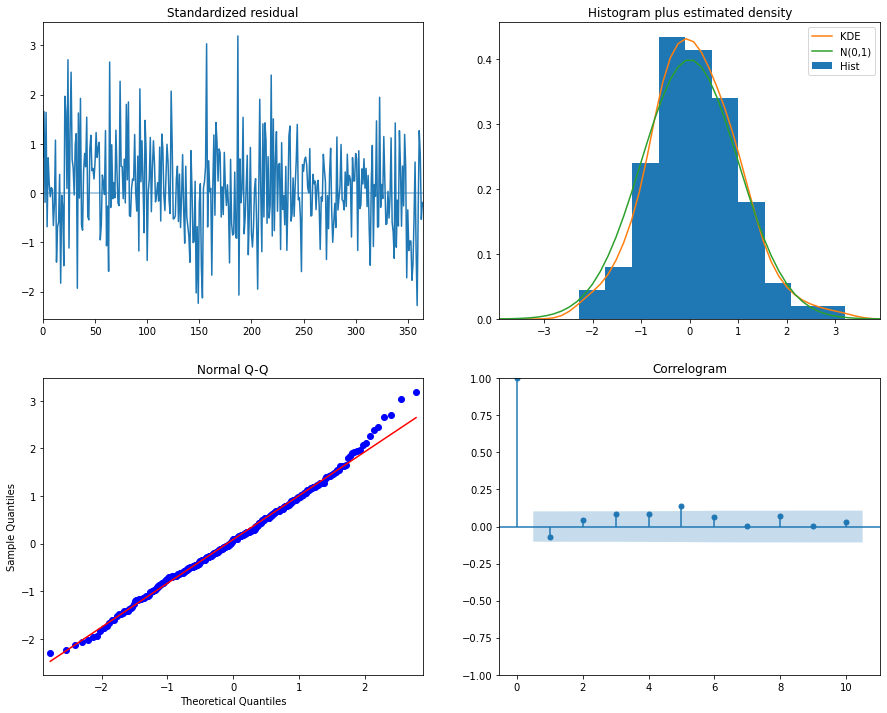

In [ ]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

Построим еще одну модель

In [ ]:
# Определим p, d и q 
q = 0
p = 2
d = 1
pdq = [p, d, q]

N2 = 30
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(data['values'].values[:-N2],
                               order=pdq, seasonal_order=[0,0,0,0],
                                 trend = 'ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 0] - AIC:1540.3738997030398
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  370
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -765.187
Date:                Mon, 02 Nov 2020   AIC                           1540.374
Time:                        22:43:33   BIC                           1559.901
Sample:                             0   HQIC                          1548.133
                                - 370                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

Посмотрим на визуализацию результатов работы модели

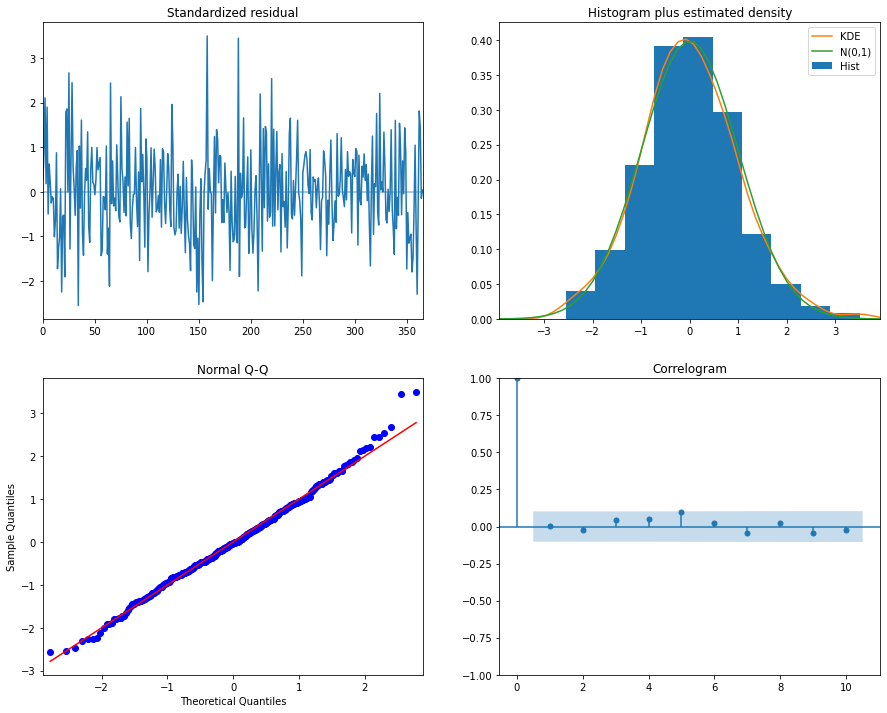

In [ ]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

Распределение остатков как и коррелограма выглядят вполне прилично, кроме пары верхних точек на Q-Q диаграмме

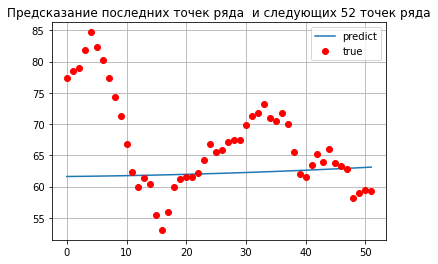

In [ ]:
pred_dynamic = resultsb.forecast(52)    #делаем предсказание на 3 точки от текущего конца ряда

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(data['values'].values[-52:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 52 точек ряда')
plt.legend()
plt.grid()
plt.plot()
plt.show()

Посмотрим на модель на этапе предсказания и этапе описания данных

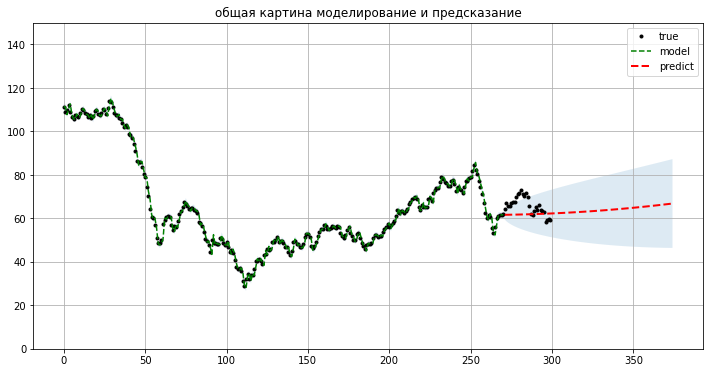

In [ ]:
N2 = 52 # число точек для теста
nforecast = N2*2  # общее число точек для предсказания (тест + чистое предсказание)
N3 = 100  # отступ от начала известной информации для визуализации - так виднее (можно брать 0-2600)
predict_ = resultsb.get_prediction(end=resultsb.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data['values'].values[N3:], 'k.',label='true')
plt.ylim([0,150])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

In [ ]:

adf_test = sm.tsa.stattools.adfuller(resultsb.resid)
print(adf_test)


(-72.31706974294131, 0.0, 0, 369, {'1%': -3.448196541708585, '5%': -2.869404683789669, '10%': -2.5709597356805545}, 1471.871178790516)


ADF тест (adf_test[1] = 0) показывает, что пока остатки являются стационарным рядом, и хотя модель требует доработки, она отвечает на вопрос о поведении ряда во времени. Это значит, что можно уверенно прогнозировать - значения модели в диапазоне дисперсии остатков.  

### Задание №6

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

Ответил на занятии ))))

Постараюсь дописать эту часть чуть позже.